In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from skimage.feature import hog

In [ ]:
classes = ['cat', 'cow', 'dog', 'lamb', 'zebra']

In [ ]:
data_dir = 'dataset'

In [ ]:
X, y = [], []

In [ ]:
def extract_hog_features(img_path):
  img =cv2.imread(img_path)
  if img is None:
    print(f"Error loading image: {img_path}")
    return None
  img = cv2.resize(img, (128, 128))
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  features = hog(gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
  return features

In [ ]:
for label, cls in enumerate(classes):
  cls_dir = os.path.join(data_dir, cls)
  if not os.path.isdir(cls_dir):
    continue
  for file in os.listdir(cls_dir):
    path = os.path.join(cls_dir, file)
    features = extract_hog_features(path)
    if features is not None:
      X.append(features)
      y.append(label)

In [ ]:
X = np.array(X)
y= np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100} %")

Accuracy: 58.139534883720934 %


In [ ]:
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=classes))


Classification Report:
              precision    recall  f1-score   support

         cat       0.57      0.91      0.70        44
         cow       0.58      0.35      0.44        20
         dog       0.50      0.19      0.28        21
        lamb       0.61      0.64      0.62        22
       zebra       0.62      0.45      0.53        22

    accuracy                           0.58       129
   macro avg       0.58      0.51      0.51       129
weighted avg       0.58      0.58      0.55       129



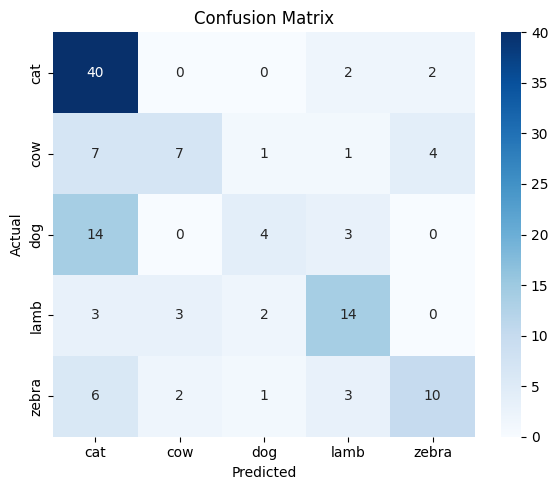

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import random

for i in random.sample(range(len(X_test)), 5):
    print(f"Sample {i}: Predicted: {classes[y_pred[i]]} | Actual: {classes[y_test[i]]}")

Sample 30: Predicted: cat | Actual: dog
Sample 71: Predicted: lamb | Actual: lamb
Sample 45: Predicted: cat | Actual: cat
Sample 124: Predicted: zebra | Actual: zebra
Sample 122: Predicted: cat | Actual: dog


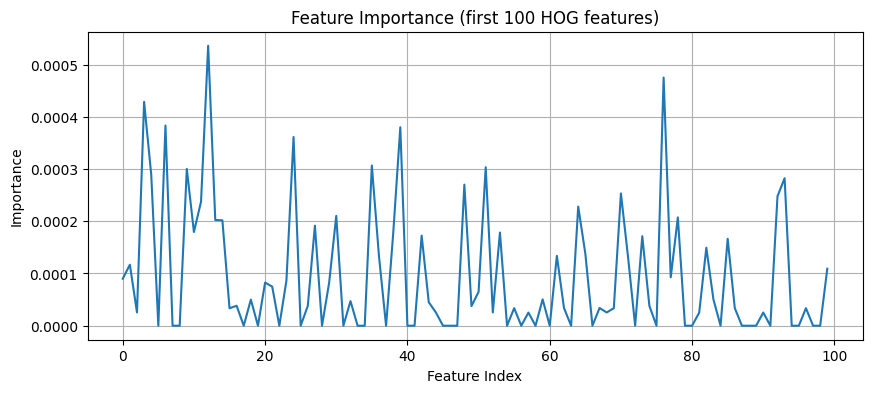

In [ ]:
importances = clf.feature_importances_

plt.figure(figsize=(10, 4))
plt.plot(importances[:100])
plt.title("Feature Importance (first 100 HOG features)")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.grid(True)
plt.show()
